In [285]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os 

meta_data = "all_data_clean.csv"

df = pd.read_csv(meta_data)

df.head()

,UNITID,OPEID,OPEID6,school_name,school_city,school_state,school_zip,Lat,Lng,avg_family_income,...,race_aian,race_nhpi,race_2mor,race_nra,race_unkn,gender_men,gender_women,institution_level,highest_degree,comp_rate_150
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,34.783368,-86.568502,32103.62,...,0.0028,0.0008,0.0143,0.0073,0.0440,0.3978,0.6022,1,4,0.2866
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,33.505697,-86.799345,57554.38,...,0.0024,0.0004,0.0469,0.0232,0.0059,0.3816,0.6184,1,4,0.6117
2,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,34.724557,-86.640449,65369.89,...,0.0083,0.0010,0.0431,0.0190,0.0252,0.5891,0.4109,1,4,0.5714
3,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,32.364317,-86.295677,27910.43,...,0.0017,0.0017,0.0119,0.0155,0.0111,0.3605,0.6395,1,4,0.3177
4,100751,105100,1051,The University of Alabama,Tuscaloosa,AL,35487-0100,33.211875,-87.545978,61307.39,...,0.0033,0.0008,0.0359,0.0187,0.0051,0.4417,0.5583,1,4,0.7214


In [286]:
# Set the color palette
color_taupe = (150/255, 140/255, 140/255)       # Taupe
color_sage = (165/255, 171/255, 129/255)        # Sage
color_rust = (221/255, 128/255, 71/255)         # Rust
color_green = (123/255, 167/255, 157/255)       # Green
color_blue = (148/255, 182/255, 210/255)        # ice Blue
color_brown = (119/255, 95/255, 85/255)         # Brown
color_gold = (216/255, 178/255, 92/255)         # Brown
color_tan = (235/255, 221/255, 195/255)         # Brown

In [287]:
#getting the quartiles in the df 


quartiles = df['avg_net_price'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
medianq = quartiles[0.5]
iqr = upperq-lowerq

#print(f"The lower quartile of Avg_Net_Price is: {lowerq}")
#print(f"The upper quartile of Avg_Net_Price is: {upperq}")
#print(f"The interquartile range of Avg_Net_Price is: {iqr}")
#print(f"The the median of Avg_Net_Price is: {medianq} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
#print(f"Values below {lower_bound} could be outliers.")
#print(f"Values above {upper_bound} could be outliers.")
max = df['avg_net_price'].max()
#print(f'Max value = {max}')
min = df['avg_net_price'].min()
#print(f'Min value = {min}')

bins = [-10000, lower_bound, lowerq, medianq, upperq, upper_bound, 100000]

# Create the names for the five bins
group_names = ['Out-','Q1','Q2', 'Q3', 'Q4', 'Out+']         # A list of potential letter grades

df['Avg_Net_Price_Q'] = pd.cut(df['avg_net_price'], bins, labels=group_names, include_lowest=True)


df.head(10)

,UNITID,OPEID,OPEID6,school_name,school_city,school_state,school_zip,Lat,Lng,avg_family_income,...,race_nhpi,race_2mor,race_nra,race_unkn,gender_men,gender_women,institution_level,highest_degree,comp_rate_150,Avg_Net_Price_Q
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,34.783368,-86.568502,32103.62,...,0.0008,0.0143,0.0073,0.0440,0.3978,0.6022,1,4,0.2866,Q2
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,33.505697,-86.799345,57554.38,...,0.0004,0.0469,0.0232,0.0059,0.3816,0.6184,1,4,0.6117,Q2
2,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,34.724557,-86.640449,65369.89,...,0.0010,0.0431,0.0190,0.0252,0.5891,0.4109,1,4,0.5714,Q2
3,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,32.364317,-86.295677,27910.43,...,0.0017,0.0119,0.0155,0.0111,0.3605,0.6395,1,4,0.3177,Q2
4,100751,105100,1051,The University of Alabama,Tuscaloosa,AL,35487-0100,33.211875,-87.545978,61307.39,...,0.0008,0.0359,0.0187,0.0051,0.4417,0.5583,1,4,0.7214,Q3
5,100830,831000,8310,Auburn University at Montgomery,Montgomery,AL,36117-3596,32.367360,-86.177544,42863.42,...,0.0007,0.0353,0.0449,0.0105,0.3367,0.6633,1,4,0.3040,Q1
6,100858,100900,1009,Auburn University,Auburn,AL,36849,32.599378,-85.488258,81768.16,...,0.0006,0.0264,0.0514,0.0027,0.5135,0.4865,1,4,0.7870,Q3
7,100937,101200,1012,Birmingham-Southern College,Birmingham,AL,35254,33.513774,-86.850552,68324.18,...,0.0000,0.0089,0.0124,0.0009,0.4632,0.5368,1,3,0.7094,Q2
8,101189,100300,1003,Faulkner University,Montgomery,AL,36109-3390,32.384181,-86.216410,53955.19,...,0.0044,0.0273,0.0202,0.0256,0.4100,0.5900,1,4,0.2711,Q3
9,101365,962107,9621,Herzing University-Birmingham,Birmingham,AL,35209,33.468466,-86.832465,21409.09,...,0.0033,0.0163,0.0000,0.0278,0.2075,0.7925,1,4,0.2222,Q4


y = 1e-05x + 0.38
R-Squared = 0.17


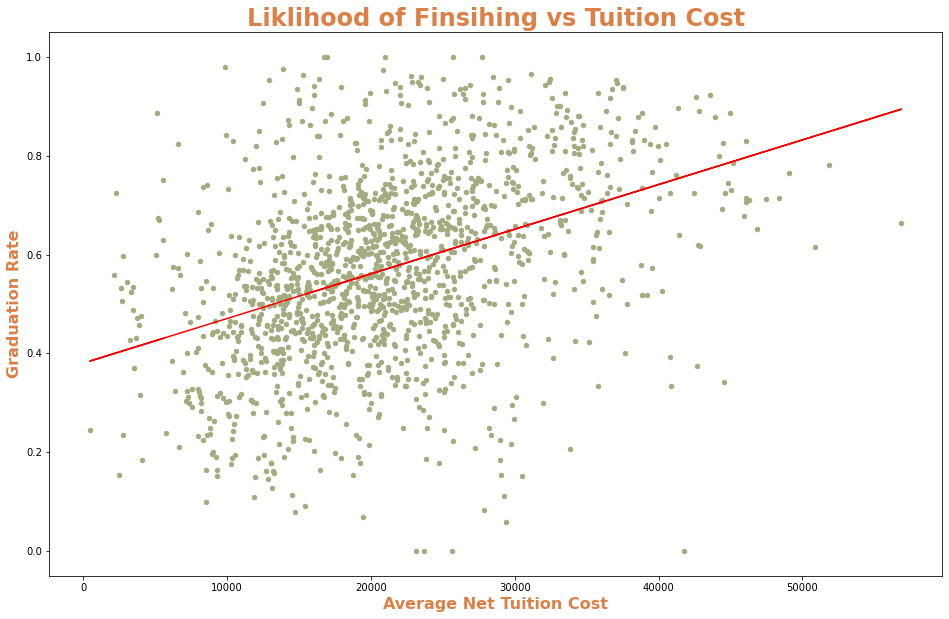

In [305]:
df.plot.scatter(x = "avg_net_price", 
                y = "comp_rate_150", 
               figsize = (16,10),   
               color = color_sage
               )
  

plt.title('Liklihood of Finsihing vs Tuition Cost',                    
            fontsize = 24,
            color=color_rust, 
            fontweight="bold")         

plt.xlabel('Average Net Tuition Cost',                           
            fontsize = 16,
            color=color_rust, 
            fontweight="bold")

plt.ylabel('Graduation Rate',                 
            fontsize = 16, 
            color=color_rust, 
            fontweight="bold")     

xdata = df['avg_net_price']
ydata = df['comp_rate_150']  
    
    
    # linear Regression equation calculation
(slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
regress_values = xdata * slope + intercept

    # create a string annoation that for the equation of the line and r**2
line_eq_str = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))       
r_square_str = f'R-Squared = {round(rvalue**2,2)}'                                  
plt.plot(xdata,regress_values,'red')

print(line_eq_str)
print(r_square_str)

save_fig = os.path.join('.', 'Output', 'graduationrate.jpg')
plt.savefig(save_fig, bbox_inches='tight')


y = 0.47x + 32359.81
R-Squared = 0.11


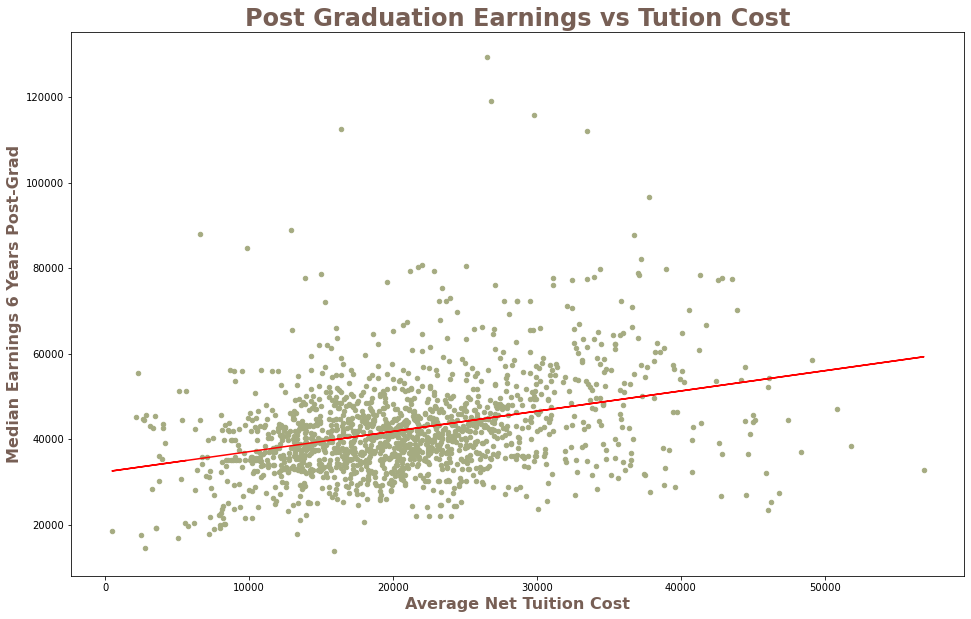

In [306]:
df.plot.scatter(x = "avg_net_price", 
                y = "median_earnings_y6", 
                title = "Tuition Cost vs Median Earning 6 Years After Graduation", 
                ylabel = "Median Earning", 
                xlabel = "Average Net Price",
                figsize = (16,10),   
                color = color_sage
               )
  

plt.title('Post Graduation Earnings vs Tution Cost',                    
            fontsize = 24,
            color=color_brown, 
            fontweight="bold")         

plt.xlabel('Average Net Tuition Cost',                           
            fontsize = 16,
            color=color_brown, 
            fontweight="bold")

plt.ylabel('Median Earnings 6 Years Post-Grad',                 
            fontsize = 16, 
            color=color_brown, 
            fontweight="bold")     

   
    
xdata = df['avg_net_price']
ydata = df['median_earnings_y6']  
    
    
    

  # linear Regression equation calculation
(slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
regress_values = xdata * slope + intercept

    # create a string annoation that for the equation of the line and r**2
line_eq_str = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))       # build text string of the form y = mx + b
r_square_str = f'R-Squared = {round(rvalue**2,2)}'                                  # build text string R-Squared = 

plt.plot(xdata,regress_values,'red')


print(line_eq_str)
print(r_square_str)


save_fig = os.path.join('.', 'Output', 'earnings.jpg')
plt.savefig(save_fig, bbox_inches='tight')

In [186]:
#making a condensed df 

quartiles_df = df[['Avg_Net_Price_Q', 'comp_rate_150', 'median_earnings_y6']].copy()


quartiles_df.drop(quartiles_df[quartiles_df['Avg_Net_Price_Q']== 'Out-'].index, inplace = True)

quartiles_df.drop(quartiles_df[quartiles_df['Avg_Net_Price_Q']== 'Out+'].index, inplace = True)

In [187]:
file_cara = os.path.join('Output', 'data_and_Q.csv')
quartiles_df.to_csv(file_cara, index=False, header=True) 

In [295]:
x = quartiles_df.groupby(["Avg_Net_Price_Q"]).mean()["median_earnings_y6"].drop(index = ["Out+", "Out-"])

x2 = quartiles_df.groupby(["Avg_Net_Price_Q"]).mean()["comp_rate_150"].drop(index = ["Out+", "Out-"])


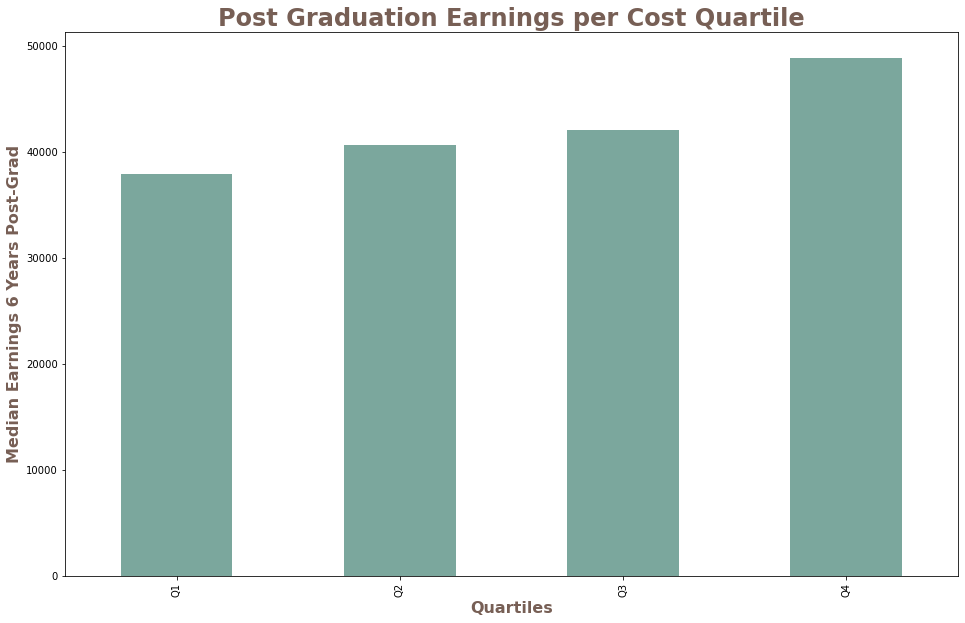

In [307]:
xy = x.plot.bar(x = 'Avg_Net_Price_Q', 
           y = 'median_earnings_y6', 
           figsize = (16,10), 
           color=color_green,  
          )

plt.title('Post Graduation Earnings per Cost Quartile',                    
            fontsize = 24,
            color=color_brown, 
            fontweight="bold")         

plt.xlabel('Quartiles',                           
            fontsize = 16,
            color=color_brown, 
            fontweight="bold")

plt.ylabel('Median Earnings 6 Years Post-Grad',                 
            fontsize = 16, 
            color=color_brown, 
            fontweight="bold")     


save_fig = os.path.join('.', 'Output', 'earningsbar.jpg')
plt.savefig(save_fig, bbox_inches='tight')

In [297]:
#Q1_schools = quartiles_df[quartiles_df["Avg_Net_Price_Q"] == "Q1"]

#Q2_schools = quartiles_df[quartiles_df["Avg_Net_Price_Q"] == "Q2"]

#Q3_schools = quartiles_df[quartiles_df["Avg_Net_Price_Q"] == "Q3"]

#Q4_schools = quartiles_df[quartiles_df["Avg_Net_Price_Q"] == "Q4"]



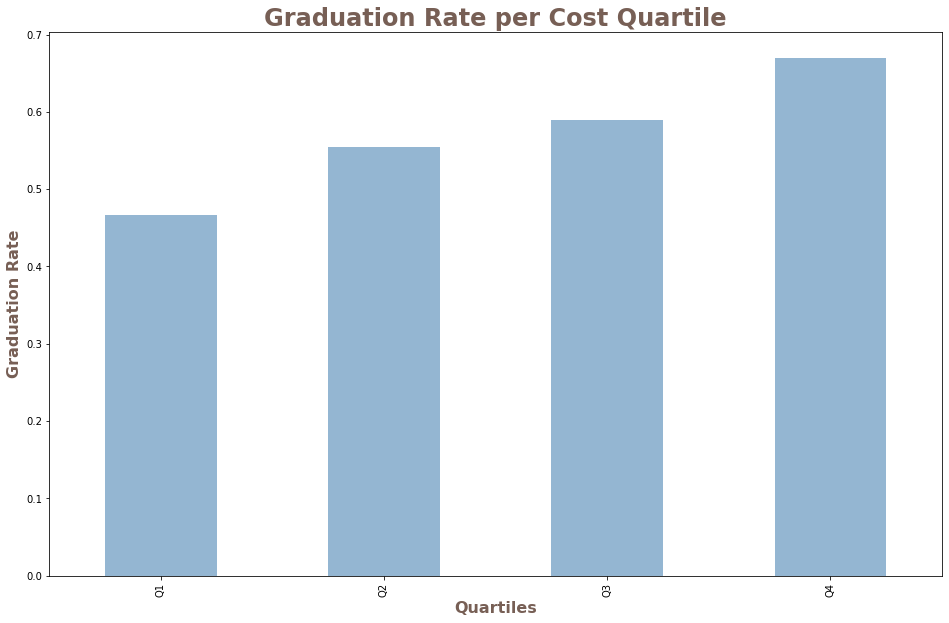

In [308]:
x2.plot.bar(x = 'Avg_Net_Price_Q', 
            y = 'comp_rate_150',
            figsize = (16,10), 
           color=color_blue,  
          )

plt.title('Graduation Rate per Cost Quartile',                    
            fontsize = 24,
            color=color_brown, 
            fontweight="bold")         

plt.xlabel('Quartiles',                           
            fontsize = 16,
            color=color_brown, 
            fontweight="bold")

plt.ylabel('Graduation Rate',                 
            fontsize = 16, 
            color=color_brown, 
            fontweight="bold")     

           
save_fig = os.path.join('.', 'Output', 'graduationbar.jpg')
plt.savefig(save_fig, bbox_inches='tight')           